In [1]:
import uproot
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [34]:
def add_uncertainty(hist, ax, ratio=False):
    opts = {'step': 'post', 'label': 'Uncertainty', 'hatch': '///',
                    'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0, 'zorder':10.}
    
    if ratio:
        down = np.ones(len(hist.counts())) - hist.errors()/hist.counts()
        up = np.ones(len(hist.counts())) + hist.errors()/hist.counts()
    else:
        down = hist.counts()-hist.errors()
        up = hist.counts()+hist.errors()
        
    ax.fill_between(x=hist.axes[0].edges(), y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

In [51]:
fitDiagnostics = uproot.open('fitDiagnostics.root')

In [52]:
fitDiagnostics.keys();

In [63]:
fitDiagnostics['shapes_prefit'].keys();

In [65]:
typekeys = ['shapes_prefit' , 'shapes_fit_s']

In [68]:
dc_sr = fitDiagnostics['shapes_fit_s/dc_sr']

In [75]:
dc_sr_pre = fitDiagnostics['shapes_prefit/dc_sr']
misID = fitDiagnostics['shapes_prefit/dc_egamma/MisID']

In [70]:
dc_sr['WG'].counts()

array([12.153373, 73.07875 , 60.05653 , 69.96337 , 42.58022 , 51.964287,
       30.305399, 31.650623, 15.585581, 15.818869], dtype=float32)

In [56]:
h = dc_sr['data']

In [57]:
h.values()[1]

array([ 292., 1198., 1915., 1261.,  868.,  655.,  506.,  340.,  242.,
        168.])

In [71]:
processes = [
    'ttgamma',
    'NonPrompt',
    'MisID',
    'WG',
    'ZG',
    'other',
]

processes.reverse()

colors = {
    'ttgamma': '',  # FIXME
    
}

labels = {
    'ttgamma': r'$t\bar{t}\gamma$',
    'NonPrompt': r'nonprompt $\gamma$',
    'MisID': r'MisID $\gamma$',
    'WG': r'$W\gamma$',
    'ZG': r'$Z\gamma$',
    'other': r'other',
}

In [59]:
def add_uncertainty(hist, ax, bins, ratio=False):
    opts = {'step': 'post', 'label': 'Uncertainty', 'hatch': '///',
                    'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0, 'zorder':10.}
    
    if ratio:
        down = np.ones(len(hist.counts())) - hist.errors()/hist.counts()
        up = np.ones(len(hist.counts())) + hist.errors()/hist.counts()
    else:
        down = hist.counts()-hist.errors()
        up = hist.counts()+hist.errors()
        
    ax.fill_between(x=bins, y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

In [60]:
M3binning = np.linspace(50, 550, 11)
chIsobinning = np.array([1.15, 2.5, 4.9, 9, 14.9, 20])
lgmassbinning = np.linspace(40, 200, 9)

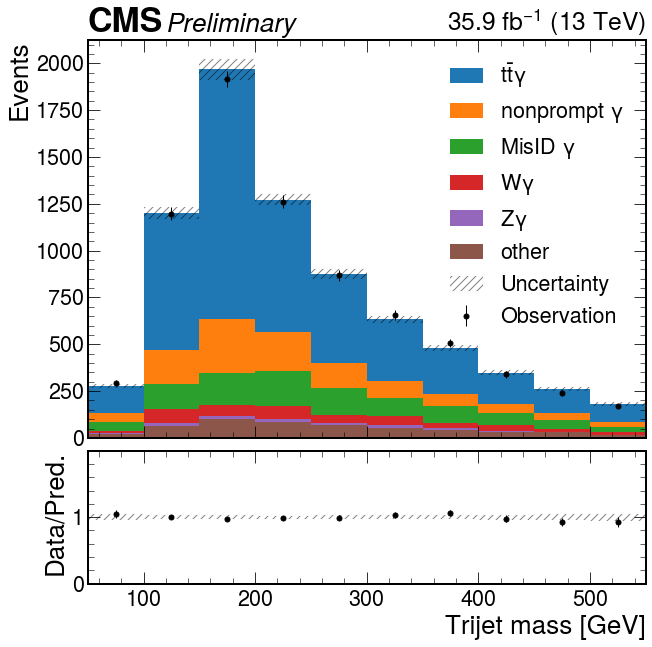

In [73]:
fig, (ax, rax) = plt.subplots(2,1,figsize=(10,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)

hep.cms.label(
    "Preliminary",
    data=True,
    lumi=35.9,
    loc=0,
    ax=ax,
)

hep.histplot(
    [ dc_sr[x].counts() for x in processes ],
    M3binning,
    #w2=[ dc_sr[x].errors() for x in processes ],  # not needed
    histtype="fill",
    stack=True,
    label=[labels[x] for x in processes],
    #color=['red', 'green'],
    ax=ax
)


hep.histplot(
    dc_sr['data'].values()[1],
    M3binning,
    w2=dc_sr['data'].values()[1],
    histtype="errorbar",
    stack=False,
    label='Observation',
    color='black',
    ax=ax
)

ratio_val = dc_sr['data'].values()[1]/dc_sr['total'].counts()
ratio_err_hep = np.sqrt(dc_sr['data'].values()[1])/dc_sr['data'].values()[1]

hep.histplot(
    ratio_val,
    M3binning,
    yerr=ratio_err_hep,
    histtype="errorbar",
    color='black',
    ax=rax
)

ax.set_xlim(50, 550)
rax.set_ylim(0,1.99)
rax.set_xlabel('Trijet mass [GeV]')
rax.set_ylabel(r'Data/Pred.')
ax.set_ylabel(r'Events')

add_uncertainty(dc_sr['total'], ax, M3binning)
add_uncertainty(dc_sr['total'], rax, M3binning, ratio=True)

ax.legend()

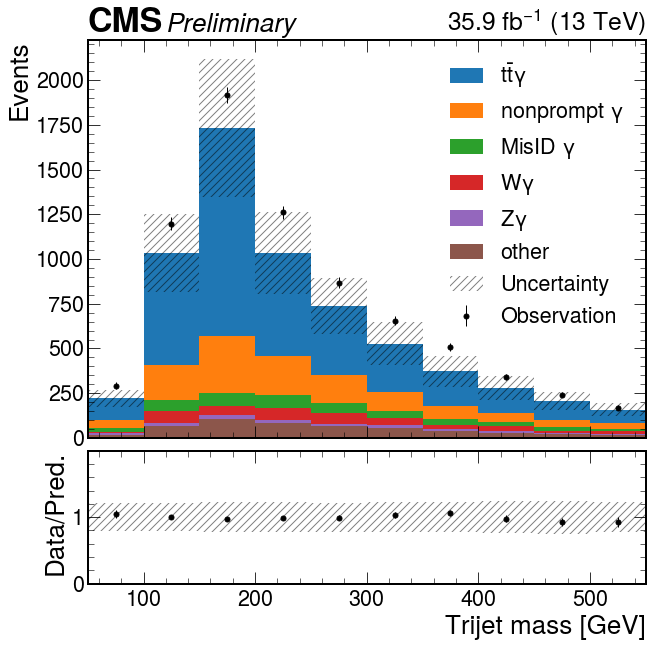

In [77]:
fig, (ax, rax) = plt.subplots(2,1,figsize=(10,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)

hep.cms.label(
    "Preliminary",
    data=True,
    lumi=35.9,
    loc=0,
    ax=ax,
)

hep.histplot(
    [ dc_sr_pre[x].counts() for x in processes ],
    M3binning,
    #w2=[ dc_sr[x].errors() for x in processes ],  # not needed
    histtype="fill",
    stack=True,
    label=[labels[x] for x in processes],
    #color=['red', 'green'],
    ax=ax
)


hep.histplot(
    dc_sr_pre['data'].values()[1],
    M3binning,
    w2=dc_sr_pre['data'].values()[1],
    histtype="errorbar",
    stack=False,
    label='Observation',
    color='black',
    ax=ax
)

ratio_val = dc_sr_pre['data'].values()[1]/dc_sr['total'].counts()
ratio_err_hep = np.sqrt(dc_sr['data'].values()[1])/dc_sr['data'].values()[1]

hep.histplot(
    ratio_val,
    M3binning,
    yerr=ratio_err_hep,
    histtype="errorbar",
    color='black',
    ax=rax
)

ax.set_xlim(50, 550)
rax.set_ylim(0,1.99)
rax.set_xlabel('Trijet mass [GeV]')
rax.set_ylabel(r'Data/Pred.')
ax.set_ylabel(r'Events')

add_uncertainty(dc_sr_pre['total'], ax, M3binning)
add_uncertainty(dc_sr_pre['total'], rax, M3binning, ratio=True)

ax.legend()

In [62]:
sum(fitDiagnostics['shapes_fit_s/dc_sr']['ttgamma'].counts())

4343.252067565918